# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rafi Ananda Subekti
- **Email:** rafiasubekti@gmail.com
- **ID Dicoding:** MC009D5Y0612

## Menentukan Pertanyaan Bisnis

- Dari 4 musim yang ada yaitu musim semi, musim panas, musim gugur, musim salju pada musim apakah peminjaman sepeda mencapai puncaknya ?

- Pada jam berapa peminjaman sepeda paling banyak terjadi dalam satu harinya ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

 Pada tabel data.csv dan hour.csv terdapat perbedaan dimana pada data.csv tidak terdapat hr
- instant = record index yang mana digunakan sebagai pembeda
- dteday = waktu atau date yang terdiri dari tanggal, bulan dan tahun
- season = musim yang terdiri dari (1:spring, 2:summer, 3:fall, 4:winter)
- mnth = bulan yang terdiri dari 12 bulan
- hr = jam yang terdiri dari (0-23)
- holiday = dimana hari tersebut merupakan hari libur atau bukan
- weekday = jumlah hari dalam seminggu
- workingday = dimana hari tersebut merupakan hari kerja diinisialisasikan dengan 1 dan hari libur diinisialisasikan dengan 0
- weathersit = tingkatan cuaca dimana terdiri dari 1 - 4 ( 1: Cerah, 2: Kabut dan Berawan, 3: Salju Ringan, 4: Hujan Lebat)
- temp = Suhu yang dinormalisasikan dalam satuan celcius (nilai dibagi menjadi 41(maksimum))
- atemp = Suhu yang dirasakan dalam satuan celcius (nilai dibagi menjadi 50 (maks))
- hum = Kelembapan yang dinormalisasikan nilai dibagi menjadi 100 (maksimum)
- windspeed = Kecepatan angin yang dinormalisasikan nilai dibagi menjadi 67 (maks)
- casual = Total jumlah pengguna biasa
- registered = Total jumlah yang terdaftar
- cnt = jumlah total sepeda sewaan termasuk yang biasa dan yang terdaftar

### Assessing Data

**Menilai Suatu Tabel**

In [6]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memeriksa Missing Value dan Duplikasi Data pada Tabel**



In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Banyaknya Duplikasi Data pada tabel dataset day_df: ", day_df.duplicated().sum())

Banyaknya Duplikasi Data pada tabel dataset day_df:  0


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Banyaknya Duplikasi Data pada tabel dataset hour_df: ", hour_df.duplicated().sum())

Banyaknya Duplikasi Data pada tabel dataset hour_df:  0


**Insight:**
- Banyaknya Missing Value pada tabel day_df dan hour_df adalah 0 atau tidak ada missing value
- Banyaknya Duplikasi data pada table day_df dan hour_df adalah 0 atau tidak ada duplikasi data

**Penjelasan lengkap dari tabel day_df dan hour_df**

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat variabel dteday sehingga dapat didefinisikan bahwa tipe data variabel dteday salah atau tidak sesuai

### Cleaning Data

**Sebelum melakukan cleaning data**

In [14]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Mengganti tipe data di dalam tabel day_df dan hour_df**

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

**Setelah Melakukan Data Cleaning**

In [17]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Variabel dteday yang tadinya belum dilakukan proses data cleaning tipe data nya adalah object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
peminjaman_per_musim = day_df.groupby("season")["cnt"].mean().reset_index()
peminjaman_per_musim

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


In [24]:
peminjaman_per_jam = hour_df.groupby("hr")["cnt"].mean().reset_index()
peminjaman_per_jam

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


**Insight:**
- Berdasarkan data diatas peminjaman banyak terjadi di musim gugur
- berdasarkan data diatas peminjaman Sepeda paling banyak terjadi di jam 17.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

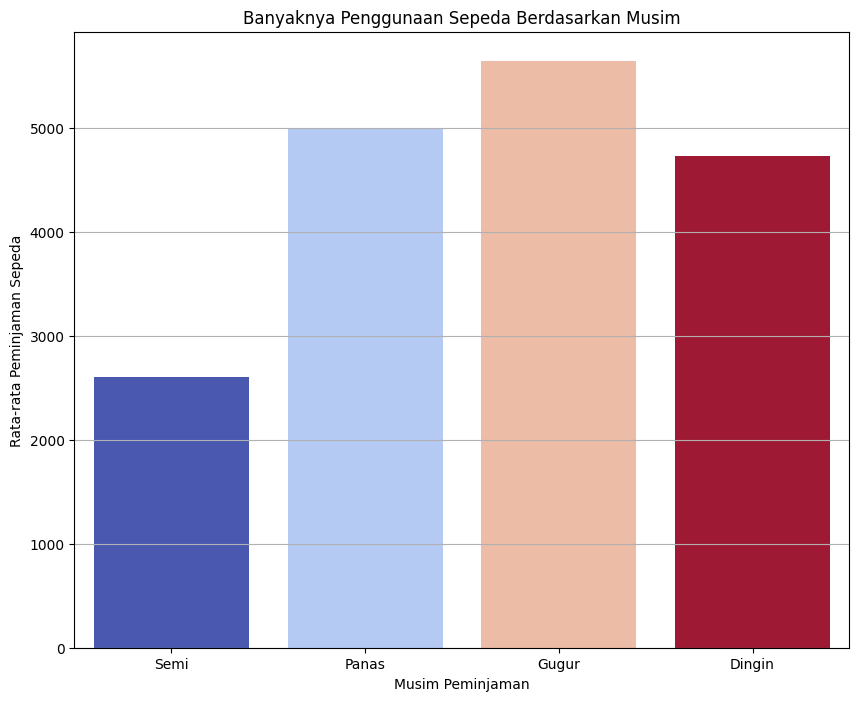

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x="season", y="cnt", hue="season", data=peminjaman_per_musim, palette="coolwarm", legend=False)
plt.xticks(ticks=range(0,4), labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.title("Banyaknya Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim Peminjaman")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.grid(axis='y')
plt.show()

**Insight:**
-  Berdasarkan grafik batang diatas peminjaman sepeda paling banyak di musim gugur dikarenakan musim gugur memiliki temperatur yang tidak terlalu panas seperti musim panas dan juga tidak terlalu dingin seperti pada musim dingin sehingga banyak orang yang melakukan peminjaman sepeda pada musim gugur

### Pertanyaan 2:

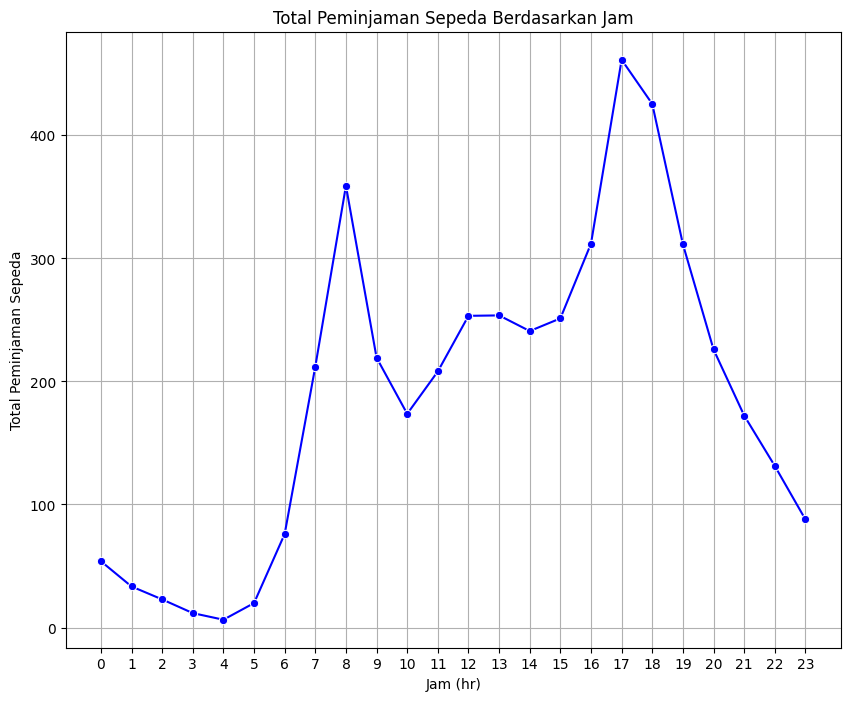

In [33]:
plt.figure(figsize=(10, 8))
sns.lineplot(x= "hr", y="cnt", data=peminjaman_per_jam, marker="o", color="b")
plt.xlabel("Jam (hr)")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Total Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Berdasarkan grafik garis diatas peminjaman Sepeda paling banyak terjadi di jam 17.00 karena pada jam itulah orang-orang pulang kerja ataupun pulang sekolah

Menggabungkan day.csv dan hour.csv

In [36]:
merged_df = pd.merge(day_df, hour_df, on="dteday", suffixes=("_dayly", "_hourly"))
merged_df

,instant_dayly,dteday,season_dayly,yr_dayly,mnth_dayly,holiday_dayly,weekday_dayly,workingday_dayly,weathersit_dayly,temp_dayly,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Conclusion

- Pertanyaan 1 : Pada musim apa peminjaman banyak terjadi ?
  - Peminjaman banyak terjadi di musim gugur sehingga kita dapat memaksimalkan persediaan sepeda yang ada di musim gugur sedangkan di musim yang lain bisa kita kurangi persediaan sepeda tersebut
- Pertanyaan 2 : Pada jam berapa (hr) peminjaman sepeda paling banyak terjadi ?
  - Jam 17.00 banyak terjadi peminjaman sepeda hal ini dikarenakan pada jam-jam ini kita harus memaksimalkan persediaan sepeda yang ada

In [37]:
from google.colab import drive

# Mount ke dalam Google Drive
drive.mount('/content/drive')

# Simpan file di dalam Google Drive
merged_df.to_csv('/content/drive/MyDrive/all_data.csv', index=False)

Mounted at /content/drive
